In [ ]:
!unzip /content/drive/MyDrive/BrainDetection.zip

Archive:  /content/drive/MyDrive/BrainDetection.zip
  inflating: Brain_Tumor_Detection/no/No12.jpg  
  inflating: Brain_Tumor_Detection/no/No13.jpg  
  inflating: Brain_Tumor_Detection/no/No14.jpg  
  inflating: Brain_Tumor_Detection/no/No15.jpg  
  inflating: Brain_Tumor_Detection/no/No17.jpg  
  inflating: Brain_Tumor_Detection/no/No18.jpg  
  inflating: Brain_Tumor_Detection/no/No19.jpg  
  inflating: Brain_Tumor_Detection/no/no0.jpg  
  inflating: Brain_Tumor_Detection/no/no1.jpg  
  inflating: Brain_Tumor_Detection/no/no10.jpg  
  inflating: Brain_Tumor_Detection/no/no100.jpg  
  inflating: Brain_Tumor_Detection/no/no1000.jpg  
  inflating: Brain_Tumor_Detection/no/no1001.jpg  
  inflating: Brain_Tumor_Detection/no/no1002.jpg  
  inflating: Brain_Tumor_Detection/no/no1003.jpg  
  inflating: Brain_Tumor_Detection/no/no1004.jpg  
  inflating: Brain_Tumor_Detection/no/no1005.jpg  
  inflating: Brain_Tumor_Detection/no/no1006.jpg  
  inflating: Brain_Tumor_Detection/no/no1007.jpg  
  

In [ ]:
# creating four separate lists,
# one for the tumor images and another for the non-tumor images
# one for the tumor labels and another for the non-tumor labels

import os
import cv2

tumor_images = []
non_tumor_images = []
tumor_labels = []
non_tumor_labels = []

for filename in os.listdir('/content/Brain_Tumor_Detection/yes'):
    img = cv2.imread(os.path.join('/content/Brain_Tumor_Detection/yes', filename))
    img = cv2.resize(img, (150, 150))
    tumor_images.append(img)
    tumor_labels.append(1)

for filename in os.listdir('/content/Brain_Tumor_Detection/no'):
    img = cv2.imread(os.path.join('/content/Brain_Tumor_Detection/no', filename))
    img = cv2.resize(img, (150, 150))
    non_tumor_images.append(img)
    non_tumor_labels.append(0)

In [ ]:
# concatenating the tumor and non-tumor images list and shuffling it randomly
# concatenating the tumor and non-tumor labels list and shuffling it randomly

import numpy as np

images = np.array(tumor_images + non_tumor_images)
labels = np.array(tumor_labels + non_tumor_labels)

indices = np.arange(images.shape[0])
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

In [ ]:
# creating the training,validation and testing datasets

train_split = 0.7
val_split = 0.15
test_split = 0.15

# calculating the split sizes
num_samples = len(images)
train_size = int(num_samples * train_split)
val_size = int(num_samples * val_split)
test_size = int(num_samples * test_split)

# spliting the data
train_images, train_labels = images[:train_size], labels[:train_size]
val_images, val_labels = images[train_size:train_size+val_size], labels[train_size:train_size+val_size]
test_images, test_labels = images[train_size+val_size:], labels[train_size+val_size:]

import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.shuffle(buffer_size=1024).batch(32)

In [ ]:
# defining the CNN model architecture
# having two convolutional layers followed by two fully connected (dense) layers

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Early Stopping and Model Checkpoint

from keras.callbacks import ModelCheckpoint, EarlyStopping

metric = "accuracy"
#Early Stopping

es = EarlyStopping(monitor = metric, min_delta = 0.01, patience = 5, verbose = 1, mode = "auto")

#Model Checkpoint

mc = ModelCheckpoint(monitor = metric, filepath = "./bestmodel.h5", verbose = 1, save_best_only = True, mode = "auto")

cd = [es, mc]

In [ ]:
# compiling the model with an optimizer, loss function, and evaluation metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# training the model 
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=cd)

Epoch 1/10
66/66 [==============================] - ETA: 0s - loss: 53.0489 - accuracy: 0.7381
Epoch 1: accuracy improved from -inf to 0.73810, saving model to ./bestmodel.h5
66/66 [==============================] - 101s 1s/step - loss: 53.0489 - accuracy: 0.7381 - val_loss: 0.4596 - val_accuracy: 0.8244
Epoch 2/10
66/66 [==============================] - ETA: 0s - loss: 0.3513 - accuracy: 0.8600
Epoch 2: accuracy improved from 0.73810 to 0.86000, saving model to ./bestmodel.h5
66/66 [==============================] - 97s 1s/step - loss: 0.3513 - accuracy: 0.8600 - val_loss: 0.3051 - val_accuracy: 0.8622
Epoch 3/10
66/66 [==============================] - ETA: 0s - loss: 0.1742 - accuracy: 0.9324
Epoch 3: accuracy improved from 0.86000 to 0.93238, saving model to ./bestmodel.h5
66/66 [==============================] - 96s 1s/step - loss: 0.1742 - accuracy: 0.9324 - val_loss: 0.2075 - val_accuracy: 0.9089
Epoch 4/10
66/66 [==============================] - ETA: 0s - loss: 0.0814 - accur

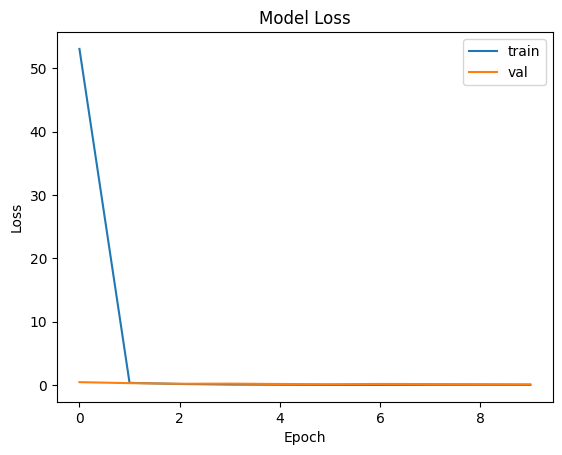

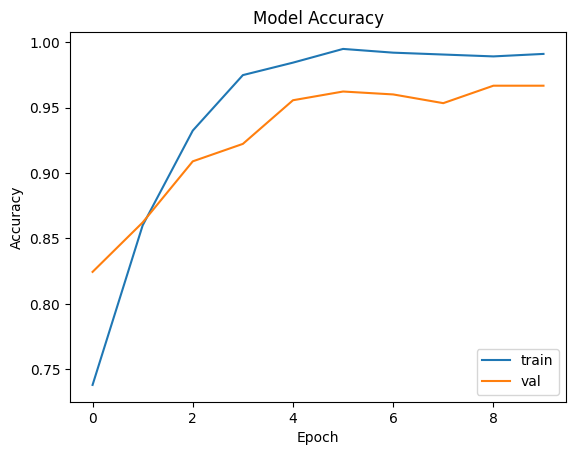

In [ ]:
import matplotlib.pyplot as plt

# plotting the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
# evaluating the model on the testing dataset

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_dataset)

# Get the predicted labels for the test set
y_pred = model.predict(test_dataset)
y_pred = tf.argmax(y_pred, axis=1).numpy()

# Calculate precision, recall, and F1 score
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred)

# Print the results
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')
print(f'Test precision: {precision:.4f}')
print(f'Test recall: {recall:.4f}')
print(f'Test F1 score: {f1:.4f}')
print('Confusion matrix:')
print(conf_matrix)

15/15 [==============================] - 4s 280ms/step
Test loss: 0.3967
Test accuracy: 0.9511
Test precision: 0.2774
Test recall: 0.5267
Test F1 score: 0.3634
Confusion matrix:
[[237   0]
 [213   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# making predictions on new images

# load the new image
img = cv2.imread('/content/drive/MyDrive/backupPreview.png')
img = cv2.resize(img, (150, 150))
img = np.expand_dims(img, axis=0)

# make a prediction on the new image
prediction = model.predict(img)

if prediction > 0.5:
    print('Cancer - Positive')
else:
    print('Cancer - Negative')

1/1 [==============================] - 0s 102ms/step
Cancer - Negative
